In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Working with Images

Supported File types:

    Windows bitmaps – *.bmp, *.dib
    JPEG files – *.jpeg, *.jpg
    Portable Network Graphics – *.png 
    WebP – *.webp 
    Sun rasters – *.sr, *.ras 
    TIFF files – *.tiff, *.tif 
    Raster and Vector geospatial data supported by GDAL 

installation commands:

pip install opencv-python   
pip install numpy   
pip install matplotlib

1) The image should be in the working directory or a full path of image should be given.
2) By default, OpenCV stores colored images in BGR(Blue Green and Red) format.

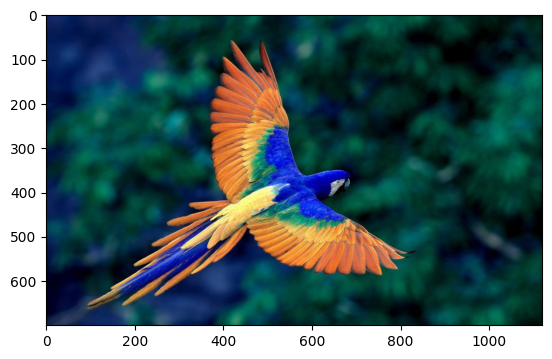

In [3]:
# reading an image
image = cv2.imread('bird.jpeg')
plt.imshow(image)

In [ ]:
import cv2
 
image = cv2.imread("bird.jpeg", cv2.IMREAD_COLOR)
cv2.imshow("image", image)
cv2.waitKey(0)
 
cv2.destroyAllWindows()

In [ ]:
# height - 700, width - 1120, channels - 3 RGB/BGR
# if grayscale image, channel - 1
image.shape

In [ ]:
# To change the image to RGB
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [ ]:
# To change the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

Extracting B,G,R channels from an image

In [ ]:
B, G, R = cv2.split(image)

In [ ]:
cv2.imshow("Blue",B)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Green",G)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Red",R)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
# Image Addition
added=cv2.add(B, G)
cv2.imshow("Added",added)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
weighted=cv2.addWeighted(B, 0.5, G, 0.5, 0.2)
cv2.imshow("Added",weighted)
cv2.waitKey(0) 
cv2.destroyAllWindows()

Video Analysis

In [ ]:
cap = cv2.VideoCapture('lane_vgt.mp4')
while(cap.isOpened()):
  # Capture each frame
    ret, frame = cap.read()
    if ret == True:
            cv2.imshow('Frame', frame)
          
            # Press Q on keyboard to exit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

In [ ]:
copy=image
plt.imshow(cv2.rectangle(image,(384,0),(510,128),(0,255,0),3))

In [ ]:
plt.imshow(cv2.circle(image,(447,63), 63, (0,0,255), -1))

In [ ]:
# Adding text to Images
font = cv2.FONT_HERSHEY_SIMPLEX
plt.imshow(cv2.putText(image,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA))

In [ ]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [ ]:
cv2.useOptimized()

In [ ]:
# ROI extraction
plt.imshow(image[280:340, 330:390])

In [ ]:
# Thresholding

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# Thresholding using TrackBar

cv2.namedWindow('change')

def nothing(x):
    pass

cv2.createTrackbar('low', 'change', 0, 255, nothing)
cv2.createTrackbar('high', 'change', 0, 255, nothing)

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


while(True):
    
    # get current positions of all Three trackbars
    l = cv2.getTrackbarPos('low', 'change')
    h = cv2.getTrackbarPos('high', 'change')

    ret,thresh = cv2.threshold(gray,l,h,cv2.THRESH_BINARY)
    
    # show image
    cv2.imshow('change', thresh)

    # for button pressing and changing
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()



In [ ]:
plt.imshow(cv2.GaussianBlur(image,(5,5),0))

In [ ]:
edges = cv2.Canny(gray,100,200)
plt.imshow(edges,cmap='gray')

In [ ]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,10,50)
plt.imshow(edges,cmap='gray')